In [1]:
#Load libraries
import csv
from textblob import TextBlob
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [4]:
#Set working directory
os.chdir("E:\Alkuluth sadanagal\datasets")

In [5]:
#Load Text data
post = pd.read_csv("tweets_wc_winner.csv",sep=',',encoding="ISO-8859-1")

In [6]:
# Select few text
post = post.iloc[:5000,]

In [7]:
post

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,RT @CarefreeDailyFC: Thibaut Courtois is the f...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646391416086529,NaN,"<a href=""http://twitter.com/download/iphone"" r...",OmarBolaji,372,True,False,NaN,NaN
1,RT @FootyAccums: Raphael Varane has won FOUR C...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646391248343041,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Tee_S4,752,True,False,NaN,NaN
2,"RT @transnotitia: ""...a fake good [winning a W...",False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646391130750976,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",DerorCurrency,2,True,False,NaN,NaN
3,RT @HolyroodLiam: The most iconic image of the...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646390312980481,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",sugarwthaf,36547,True,False,NaN,NaN
4,my sleep schedule is ruined but that was a ver...,False,2,NaN,2018-07-15 23:59:59,False,NaN,1018646389935386625,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",AstroDouche,0,False,False,NaN,NaN
5,RT @nikkihaley: Congrats to our French friends...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646389063127042,NaN,"<a href=""http://twitter.com/download/iphone"" r...",swanson_real,581,True,False,NaN,NaN
6,RT @MohammadKaif: Croatia deserves a lot of cr...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646388815613952,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",OBIZUOGU,440,True,False,NaN,NaN
7,RT @KristenClarkeJD: Boom! France wins World C...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646388777914370,NaN,"<a href=""http://twitter.com/download/android"" ...",ficklin,58,True,False,NaN,NaN
8,RT @PainterNell: This title says everything--i...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646388777914368,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Prof_Kennedy,5,True,False,NaN,NaN
9,RT @TheNotoriousMMA: Enjoying the World Cup fi...,False,0,NaN,2018-07-15 23:59:59,False,NaN,1018646388647788544,NaN,"<a href=""http://twitter.com/download/iphone"" r...",JoshuaaRdz_,14174,True,False,NaN,NaN


In [8]:
# Download Repository
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [9]:
# Extract stop words
stop = set(stopwords.words("english"))

# Remove punctuation marks
exclude = set(string.punctuation)

In [10]:
# Text pre processing
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = " ".join([ch for ch in stop_free.lower().split() if ch not in exclude])
    num_free = " ".join(i for i in punc_free if not i.isdigit())
    return num_free

post_corpus = [clean(post.iloc[i,0]) for i in range(0, post.shape[0])]

In [11]:
# Create document term matrix
tdm = textmining.TermDocumentMatrix()

for i in post_corpus:
    
    tdm.add_doc(i)

In [12]:
# Write tdm
tdm.write_csv("TDM_DataFRame.csv", cutoff = 1)

In [13]:
# Load dataframe for analysis
df = pd.read_csv("TDM_DataFRame.csv")

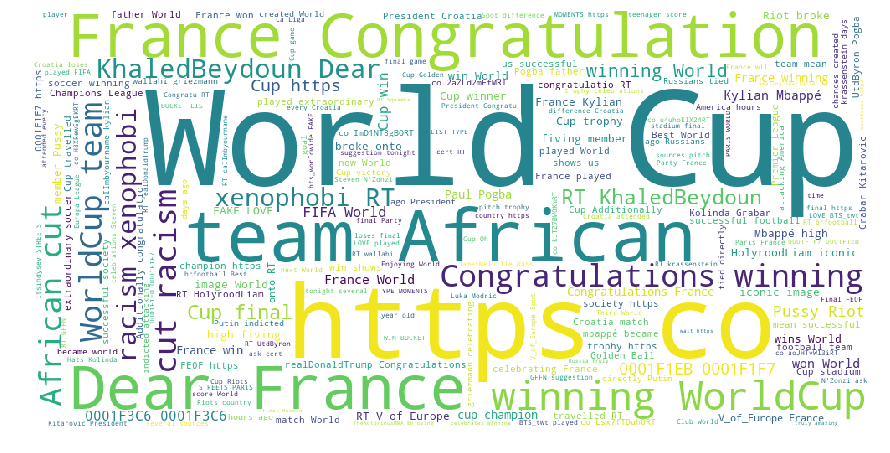

In [14]:
#Plot wordcloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(post['text']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Sentiment Analysis

In [15]:
# Sentiment analysis using Text Blob
# Create empty dataframe to store results
FinalResults = pd.DataFrame()

# Run Engine
for i in range(0, post.shape[0]):
    
    blob = TextBlob(post.iloc[i,0])
    
    temp = pd.DataFrame({'Comments': post.iloc[i,0], 'Polarity': blob.sentiment.polarity}, index = [0])
    
    FinalResults = FinalResults.append(temp)    

In [16]:
# Sentiment Analysis using Vader
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, post.shape[0]):
    
    snt = analyzer.polarity_scores(post.iloc[i,0])
    
    temp = pd.DataFrame({'Comments': post.iloc[i,0], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResults_Vader = FinalResults_Vader.append(temp)    

In [17]:
FinalResults_Vader

,Comments,Polarity
0,RT @CarefreeDailyFC: Thibaut Courtois is the f...,0.8934
0,RT @FootyAccums: Raphael Varane has won FOUR C...,0.8481
0,"RT @transnotitia: ""...a fake good [winning a W...",-0.6808
0,RT @HolyroodLiam: The most iconic image of the...,-0.7506
0,my sleep schedule is ruined but that was a ver...,0.5913
0,RT @nikkihaley: Congrats to our French friends...,0.9371
0,RT @MohammadKaif: Croatia deserves a lot of cr...,0.9274
0,RT @KristenClarkeJD: Boom! France wins World C...,0.6114
0,RT @PainterNell: This title says everything--i...,0.0000
0,RT @TheNotoriousMMA: Enjoying the World Cup fi...,0.8858


In [31]:
negative_count=0
positive_count=0

for i in range(0,5000):
    if(float(FinalResults_Vader.iloc[i,1])<-0.5):
        negative_count=negative_count+1
    elif(float(FinalResults_Vader.iloc[i,1])>0.5):
        positive_count=positive_count+1
    


In [32]:
negative_count

321

In [33]:
positive_count

2797

In [34]:
neutral_count=5000-(positive_count+negative_count)

In [35]:
# Percentage of people who are happy with WC result
positive_count/5000

0.5594

In [36]:
# Percentage of people who are not happy with WC result
negative_count/5000

0.0642

In [37]:
# Percentage of people who are neutral with WC result
neutral_count/5000

0.3764